<a href="https://colab.research.google.com/github/Allzer/Neural-networks-on-Python/blob/main/9_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [57]:
#Просто загружаем данные
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255 #Т.к изображение ЧБ, то после такого преобразование белый - 1, чёрный - 0
x_test = x_test/255

y_train_cat = keras.utils.to_categorical(y_train, 10) #Преобразовали данные в векторы. Там, где нужная цифра по счёту, будет стоять 1
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3) #Добавляем 3 ось, чтобы данные соответстствовали формату data_format
x_test = np.expand_dims(x_test, axis=3)

In [63]:
model = keras.Sequential([
    Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(64,(3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(137, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])
#Слой Flatten нужен для сглаживания входного тензора, сохраняя при этом ось пакета (ось 0).
#Это означает, что он преобразует входной тензор из многомерного тензора в одномерный тензор
#print(model.summary())

(60000, 28, 28, 1)
Epoch 1/7
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1668 - accuracy: 0.9475 - val_loss: 0.0540 - val_accuracy: 0.9847
Epoch 2/7
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0412 - val_accuracy: 0.9862
Epoch 3/7
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 4/7
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 5/7
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0355 - val_accuracy: 0.9902
Epoch 6/7
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0343 - val_accuracy: 0.9911
Epoch 7/7
313/313 [==============================] - 2s 7ms/step - loss: 0.0354 - accuracy: 0.9905


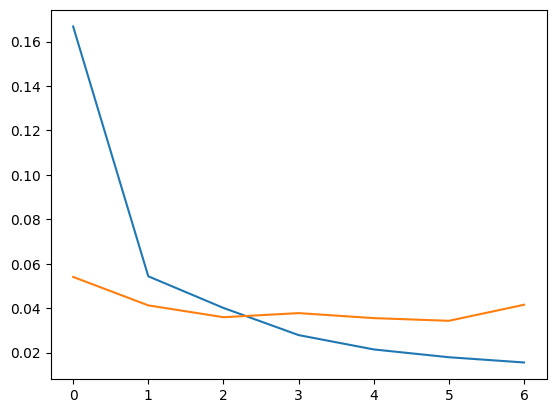

In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(x_train.shape)

his = model.fit(x_train, y_train_cat, batch_size=32, epochs=7, validation_split=0.2)
#Строим графики валидации и лоса

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()


In [65]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 2s 8ms/step - loss: 0.0354 - accuracy: 0.9905


[0.03537825495004654, 0.9904999732971191]